# Shor's Algorithm

Mauricio David Correa Hernández

Shor’s algorithm is famous for factoring integers in polynomial time. Since the best-known classical algorithm requires greater-than-polynomial time to factor the product of two primes, the widely used cryptographic protocol, RSA, relies on factoring being impossible for large enough integers.

In this chapter we will focus on the quantum part of Shor’s algorithm, which actually solves the problem of _period finding_. Since a factoring problem can be turned into a period finding problem in polynomial time, an efficient period finding algorithm can be used to factor integers efficiently too. For now its enough to show that if we can compute the period of $a^x\bmod N$ efficiently, then we can also efficiently factor. Since period finding is a worthy problem in its own right, we will first solve this, then discuss how this can be used to factor in section 5.

## 1. The Problem: Period Finding


Let’s look at the periodic function:

$$ f(x) = a^x \bmod{N}$$

The modulo operation (abbreviated to 'mod') simply means to find the remainder when dividing one number by another. For example:

$$ 17 \bmod 5 = 2 $$

Since $17 \div 5 = 3$ with remainder $2$. (i.e. $17 = (3\times 5) + 2$). In Python, the modulo operation is denoted through the <code>%</code> symbol.

This behaviour is used in <a href="https://en.wikipedia.org/wiki/Modular_arithmetic">modular arithmetic</a>, where numbers 'wrap round' after reaching a certain value (the modulus). Using modular arithmetic, we could write:

$$ 17 = 2 \pmod 5$$

Note that here the $\pmod 5$ applies to the entire equation (since it's in parenthesis), unlike the equation above where it only applied to the left-hand side of the equation.
</details>

where $a$ and $N$ are positive integers, $a$ is less than $N$, and they have no common factors. The period, or order ($r$), is the smallest (non-zero) integer such that:

$$a^r \bmod N = 1 $$

We can see an example of this function plotted on the graph below. Note that the lines between points are to help see the periodicity and do not represent the intermediate values between the x-markers.

## 2. The Solution



Shor’s solution was to use [quantum phase estimation](./quantum-phase-estimation.html) on the unitary operator:

$$ U|y\rangle \equiv |ay \bmod N \rangle $$

To see how this is helpful, let’s work out what an eigenstate of U might look like. If we started in the state $|1\rangle$, we can see that each successive application of U will multiply the state of our register by $a \pmod N$, and after $r$ applications we will arrive at the state $|1\rangle$ again. For example with $a = 3$ and $N = 35$:

$$\begin{aligned}
U|1\rangle &= |3\rangle & \\
U^2|1\rangle &= |9\rangle \\
U^3|1\rangle &= |27\rangle \\
& \vdots \\
U^{(r-1)}|1\rangle &= |12\rangle \\
U^r|1\rangle &= |1\rangle
\end{aligned}$$

So a superposition of the states in this cycle ($|u_0\rangle$) would be an eigenstate of $U$:

$$|u_0\rangle = \tfrac{1}{\sqrt{r}}\sum_{k=0}^{r-1}{|a^k \bmod N\rangle} $$

$$\begin{aligned}
|u_0\rangle &= \tfrac{1}{\sqrt{12}}(|1\rangle + |3\rangle + |9\rangle \dots + |4\rangle + |12\rangle) \\[10pt]
U|u_0\rangle &= \tfrac{1}{\sqrt{12}}(U|1\rangle + U|3\rangle + U|9\rangle \dots + U|4\rangle + U|12\rangle) \\[10pt]
 &= \tfrac{1}{\sqrt{12}}(|3\rangle + |9\rangle + |27\rangle \dots + |12\rangle + |1\rangle) \\[10pt]
 &= |u_0\rangle
\end{aligned}$$

This eigenstate has an eigenvalue of 1, which isn’t very interesting. A more interesting eigenstate could be one in which the phase is different for each of these computational basis states. Specifically, let’s look at the case in which the phase of the $k^\text{th}$ state is proportional to $k$:

$$\begin{aligned}
|u_1\rangle &= \tfrac{1}{\sqrt{r}}\sum_{k=0}^{r-1}{e^{-\tfrac{2\pi i k}{r}}|a^k \bmod N\rangle}\\[10pt]
U|u_1\rangle &= e^{\tfrac{2\pi i}{r}}|u_1\rangle
\end{aligned}
$$

$$\begin{aligned}
|u_1\rangle &= \tfrac{1}{\sqrt{12}}(|1\rangle + e^{-\tfrac{2\pi i}{12}}|3\rangle + e^{-\tfrac{4\pi i}{12}}|9\rangle \dots + e^{-\tfrac{20\pi i}{12}}|4\rangle + e^{-\tfrac{22\pi i}{12}}|12\rangle) \\[10pt]
U|u_1\rangle &= \tfrac{1}{\sqrt{12}}(|3\rangle + e^{-\tfrac{2\pi i}{12}}|9\rangle + e^{-\tfrac{4\pi i}{12}}|27\rangle \dots + e^{-\tfrac{20\pi i}{12}}|12\rangle + e^{-\tfrac{22\pi i}{12}}|1\rangle) \\[10pt]
U|u_1\rangle &= e^{\tfrac{2\pi i}{12}}\cdot\tfrac{1}{\sqrt{12}}(e^{\tfrac{-2\pi i}{12}}|3\rangle + e^{-\tfrac{4\pi i}{12}}|9\rangle + e^{-\tfrac{6\pi i}{12}}|27\rangle \dots + e^{-\tfrac{22\pi i}{12}}|12\rangle + e^{-\tfrac{24\pi i}{12}}|1\rangle) \\[10pt]
U|u_1\rangle &= e^{\tfrac{2\pi i}{12}}|u_1\rangle
\end{aligned}$$

(We can see $r = 12$ appears in the denominator of the phase.)

This is a particularly interesting eigenvalue as it contains $r$. In fact, $r$ has to be included to make sure the phase differences between the $r$ computational basis states are equal. This is not the only eigenstate with this behaviour; to generalise this further, we can multiply an integer, $s$, to this phase difference, which will show up in our eigenvalue:

$$\begin{aligned}
|u_s\rangle &= \tfrac{1}{\sqrt{r}}\sum_{k=0}^{r-1}{e^{-\tfrac{2\pi i s k}{r}}|a^k \bmod N\rangle}\\[10pt]
U|u_s\rangle &= e^{\tfrac{2\pi i s}{r}}|u_s\rangle
\end{aligned}
$$

$$\begin{aligned}
|u_s\rangle &= \tfrac{1}{\sqrt{12}}(|1\rangle + e^{-\tfrac{2\pi i s}{12}}|3\rangle + e^{-\tfrac{4\pi i s}{12}}|9\rangle \dots + e^{-\tfrac{20\pi i s}{12}}|4\rangle + e^{-\tfrac{22\pi i s}{12}}|12\rangle) \\[10pt]
U|u_s\rangle &= \tfrac{1}{\sqrt{12}}(|3\rangle + e^{-\tfrac{2\pi i s}{12}}|9\rangle + e^{-\tfrac{4\pi i s}{12}}|27\rangle \dots + e^{-\tfrac{20\pi i s}{12}}|12\rangle + e^{-\tfrac{22\pi i s}{12}}|1\rangle) \\[10pt]
U|u_s\rangle &= e^{\tfrac{2\pi i s}{12}}\cdot\tfrac{1}{\sqrt{12}}(e^{-\tfrac{2\pi i s}{12}}|3\rangle + e^{-\tfrac{4\pi i s}{12}}|9\rangle + e^{-\tfrac{6\pi i s}{12}}|27\rangle \dots + e^{-\tfrac{22\pi i s}{12}}|12\rangle + e^{-\tfrac{24\pi i s}{12}}|1\rangle) \\[10pt]
U|u_s\rangle &= e^{\tfrac{2\pi i s}{12}}|u_s\rangle
\end{aligned}$$

We now have a unique eigenstate for each integer value of $s$ where $0 \leq s \leq r-1.$ Very conveniently, if we sum up all these eigenstates, the different phases cancel out all computational basis states except $|1\rangle$:

$$ \tfrac{1}{\sqrt{r}}\sum_{s=0}^{r-1} |u_s\rangle = |1\rangle$$

For this, we will look at a smaller example where $a = 7$ and $N=15$. In this case $r=4$:

$$\begin{aligned}
\tfrac{1}{2}(\quad|u_0\rangle &= \tfrac{1}{2}(|1\rangle \hphantom{e^{-\tfrac{2\pi i}{12}}}+ |7\rangle \hphantom{e^{-\tfrac{12\pi i}{12}}} + |4\rangle \hphantom{e^{-\tfrac{12\pi i}{12}}} + |13\rangle)\dots \\[10pt]
+ |u_1\rangle &= \tfrac{1}{2}(|1\rangle + e^{-\tfrac{2\pi i}{4}}|7\rangle + e^{-\tfrac{\hphantom{1}4\pi i}{4}}|4\rangle + e^{-\tfrac{\hphantom{1}6\pi i}{4}}|13\rangle)\dots \\[10pt]
+ |u_2\rangle &= \tfrac{1}{2}(|1\rangle + e^{-\tfrac{4\pi i}{4}}|7\rangle + e^{-\tfrac{\hphantom{1}8\pi i}{4}}|4\rangle + e^{-\tfrac{12\pi i}{4}}|13\rangle)\dots \\[10pt]
+ |u_3\rangle &= \tfrac{1}{2}(|1\rangle + e^{-\tfrac{6\pi i}{4}}|7\rangle + e^{-\tfrac{12\pi i}{4}}|4\rangle + e^{-\tfrac{18\pi i}{4}}|13\rangle)\quad) = |1\rangle \\[10pt]
\end{aligned}$$

Since the computational basis state $|1\rangle$ is a superposition of these eigenstates, which means if we do QPE on $U$ using the state $|1\rangle$, we will measure a phase:

$$\phi = \frac{s}{r}$$

Where $s$ is a random integer between $0$ and $r-1$. We finally use the [continued fractions](https://en.wikipedia.org/wiki/Continued_fraction) algorithm on $\phi$ to find $r$. The circuit diagram looks like this (note that this diagram uses Qiskit's qubit ordering convention):

We will next demonstrate Shor’s algorithm using Qiskit’s simulators. For this demonstration we will provide the circuits for $U$ without explanation, but in section 4 we will discuss how circuits for $U^{2^j}$ can be constructed efficiently.

## 3. Qiskit Implementation



In this example we will solve the period finding problem for $a=7$ and $N=15$. We provide the circuits for $U$ where:

$$U|y\rangle = |ay\bmod 15\rangle $$

without explanation. To create $U^x$, we will simply repeat the circuit $x$ times. In the next section we will discuss a general method for creating these circuits efficiently. The function `c_amod15` returns the controlled-U gate for `a`, repeated `power` times.

### Installations

In [2]:
!pip install pyyaml packaging requests pillow markupsafe beautifulsoup4 babel catkin-pkg colcon-core colcon-python-setup-py colcon-ros colcon-common-extensions
!pip install qiskit
!pip install qiskit[visualization]
!pip install qiskit-ibm-runtime
!pip install qiskit-aer

#### Version

In [23]:
!pip show qiskit

Name: qiskit
Version: 2.0.2
Summary: An open-source SDK for working with quantum computers at the level of extended quantum circuits, operators, and primitives.
Home-page: https://www.ibm.com/quantum/qiskit
Author: 
Author-email: Qiskit Development Team <qiskit@us.ibm.com>
License: Apache 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: dill, numpy, python-dateutil, rustworkx, scipy, stevedore, symengine, sympy, typing-extensions
Required-by: qiskit-aer, qiskit-ibm-runtime


### Code Try 1 - From Qiskit TextBook - Traslated to Qiskit Version 2.0.2.

#### Imports

In [ ]:
# Initialization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.random import randint
from math import log2, ceil, gcd
from fractions import Fraction

# importing Qiskit
from qiskit_aer import AerSimulator
from qiskit import transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

# import basic plot tools and circuits
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import QFT

print('Importaciones completadas correctamente')

Importaciones completadas correctamente


#### Function

In [ ]:
def optener_numero_de_qubits(N):
  return ceil(log2(N))


In [ ]:
def c_amod15(a, power, n_qubits_mas_para_modulo, N):
    """Controlled multiplication by a mod 15"""
    if a not in [2,4,7,8,11,13]:
        raise ValueError("'a' must be 2,4,7,8,11 or 13")
    U = QuantumCircuit(n_qubits_mas_para_modulo)
    for _iteration in range(power):
        if a in [2,13]:
            U.swap(2,3)
            U.swap(1,2)
            U.swap(0,1)
        if a in [7,8]:
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
        if a in [4, 11]:
            U.swap(1,3)
            U.swap(0,2)
        if a in [7,11,13]:
            for q in range(n_qubits_mas_para_modulo):
                U.x(q)
    U = U.to_gate()
    U.name = f"  {a}^{power} mod {N}  "
    c_U = U.control()
    return c_U

#### Building block of Shor's algorithm

In [ ]:
N = 15
a = 7
N_COUNT = 8
n_qubits_mas_para_modulo = optener_numero_de_qubits(N)
print(f'Número de qubit adicionale para modulo: {n_qubits_mas_para_modulo}')
qc = QuantumCircuit(N_COUNT + n_qubits_mas_para_modulo, N_COUNT)

# Initialize counting qubits
# in state |+>
for q in range(N_COUNT):
    qc.h(q)

# And auxiliary register in state |1>
qc.x(N_COUNT)

# Do controlled-U operations
for q in range(N_COUNT):
    qc.append(c_amod15(a, 2**q, n_qubits_mas_para_modulo, N),
             [q] + [i+N_COUNT for i in range(n_qubits_mas_para_modulo)])

# Do inverse-QFT
invQFT = QFT(N_COUNT, do_swaps=True).inverse()
qc.append(invQFT, range(N_COUNT))

# Measure circuit
qc.measure(range(N_COUNT), range(N_COUNT))
qc.draw(fold=-1)  # -1 means 'do not fold'

Número de qubit adicionale para modulo: 4


┌───┐                                                                                                                                                             ┌───────┐┌─┐                     
 q_0: ┤ H ├─────────■───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤0      ├┤M├─────────────────────
      ├───┤         │                                                                                                                                                   │       │└╥┘┌─┐                  
 q_1: ┤ H ├─────────┼──────────────────■────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤1      ├─╫─┤M├──────────────────
      ├───┤         │                  │                                                                                                                                │       │ ║ └╥┘┌─┐               
 q_2: ┤ H ├─────────┼──────────────────┼──────────────────■─────────────────────────────────────────────────────────────────────────────────────────────────────────────┤2      ├─╫──╫─┤M├───────────────
      ├───┤         │                  │                  │                                                                                                             │       │ ║  ║ └╥┘┌─┐            
 q_3: ┤ H ├─────────┼──────────────────┼──────────────────┼──────────────────■──────────────────────────────────────────────────────────────────────────────────────────┤3      ├─╫──╫──╫─┤M├────────────
      ├───┤         │                  │                  │                  │                                                                                          │  IQFT │ ║  ║  ║ └╥┘┌─┐         
 q_4: ┤ H ├─────────┼──────────────────┼──────────────────┼──────────────────┼──────────────────■───────────────────────────────────────────────────────────────────────┤4      ├─╫──╫──╫──╫─┤M├─────────
      ├───┤         │                  │                  │                  │                  │                                                                       │       │ ║  ║  ║  ║ └╥┘┌─┐      
 q_5: ┤ H ├─────────┼──────────────────┼──────────────────┼──────────────────┼──────────────────┼───────────────────■───────────────────────────────────────────────────┤5      ├─╫──╫──╫──╫──╫─┤M├──────
      ├───┤         │                  │                  │                  │                  │                   │                                                   │       │ ║  ║  ║  ║  ║ └╥┘┌─┐   
 q_6: ┤ H ├─────────┼──────────────────┼──────────────────┼──────────────────┼──────────────────┼───────────────────┼───────────────────■───────────────────────────────┤6      ├─╫──╫──╫──╫──╫──╫─┤M├───
      ├───┤         │                  │                  │                  │                  │                   │                   │                               │       │ ║  ║  ║  ║  ║  ║ └╥┘┌─┐
 q_7: ┤ H ├─────────┼──────────────────┼──────────────────┼──────────────────┼──────────────────┼───────────────────┼───────────────────┼────────────────────■──────────┤7      ├─╫──╫──╫──╫──╫──╫──╫─┤M├
      ├───┤┌────────┴────────┐┌────────┴────────┐┌────────┴────────┐┌────────┴────────┐┌────────┴─────────┐┌────────┴─────────┐┌────────┴─────────┐┌─────────┴─────────┐└───────┘ ║  ║  ║  ║  ║  ║  ║ └╥┘
 q_8: ┤ X ├┤0                ├┤0                ├┤0                ├┤0                ├┤0                 ├┤0                 ├┤0                 ├┤0                  ├──────────╫──╫──╫──╫──╫──╫──╫──╫─
      └───┘│                 ││                 ││                 ││                 ││                  ││                  ││                  ││                   │          ║  ║  ║  ║  ║  ║  ║  ║ 
 q_9: ─────┤1                ├┤1                ├┤1                ├┤1                ├┤1                 ├┤1                 ├┤1                 ├┤1                  ├

#### Results.

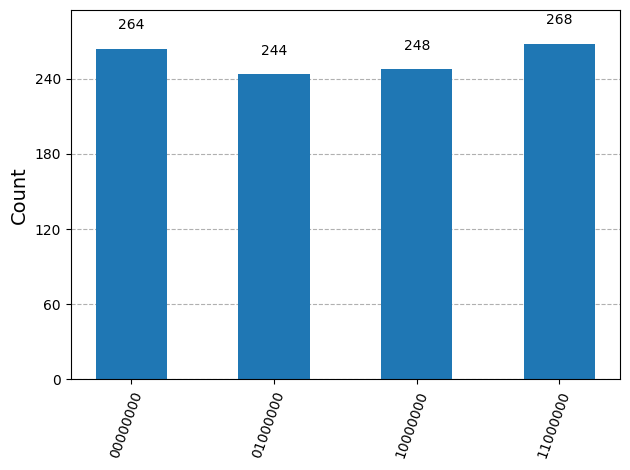

In [ ]:
# Let's see the results!
aer_sim = AerSimulator()
shots = 4096
t_qc = transpile(qc, aer_sim)
counts = aer_sim.run(t_qc).result().get_counts()

plot_histogram(counts)

In [ ]:
rows, measured_phases = [], []
for output in counts:
    decimal = int(output, 2)  # Convert (base 2) string to decimal
    phase = decimal/(2**N_COUNT)  # Find corresponding eigenvalue
    measured_phases.append(phase)
    # Add these values to the rows in our table:
    rows.append([f"{output}(bin) = {decimal:>3}(dec)",
                 f"{decimal}/{2**N_COUNT} = {phase:.2f}"])
# Print the rows in a table
headers=["Register Output", "Phase"]
df = pd.DataFrame(rows, columns=headers)
print(df)

            Register Output           Phase
0  11000000(bin) = 192(dec)  192/256 = 0.75
1  00000000(bin) =   0(dec)    0/256 = 0.00
2  01000000(bin) =  64(dec)   64/256 = 0.25
3  10000000(bin) = 128(dec)  128/256 = 0.50


In [ ]:
Fraction(0.666)


Fraction(5998794703657501, 9007199254740992)

In [ ]:
# Get fraction that most closely resembles 0.666
# with denominator < 15
Fraction(0.666).limit_denominator(15)


Fraction(2, 3)

In [ ]:
rows = []
for phase in measured_phases:
    frac = Fraction(phase).limit_denominator(15)
    rows.append([phase,
                 f"{frac.numerator}/{frac.denominator}",
                 frac.denominator])
# Print as a table
headers=["Phase", "Fraction", "Guess for r"]
df = pd.DataFrame(rows, columns=headers)
print(df)


   Phase Fraction  Guess for r
0   0.75      3/4            4
1   0.00      0/1            1
2   0.25      1/4            4
3   0.50      1/2            2


In [ ]:
def a2jmodN(a, j, N):
    """Compute a^{2^j} (mod N) by repeated squaring"""
    for _ in range(j):
        a = np.mod(a**2, N)
    return a


In [ ]:
a2jmodN(7, 2049, 53)

np.int64(47)

In [ ]:
np.random.seed(1) # This is to make sure we get reproduceable results
a = randint(2, N)
print(a)

7


In [ ]:
gcd(a, N)

1

#### Quantum Phase Estimation

In [ ]:
def qpe_amod15(a, N):
    """Performs quantum phase estimation on the operation a*r mod 15.
    Args:
        a (int): This is 'a' in a*r mod 15
    Returns:
        float: Estimate of the phase
    """
    N_COUNT = 8
    n_qubits_mas_para_modulo = optener_numero_de_qubits(N)
    qc = QuantumCircuit(N_COUNT + n_qubits_mas_para_modulo, N_COUNT)
    for q in range(N_COUNT):
        qc.h(q)     # Initialize counting qubits in state |+>

    qc.x(N_COUNT) # And auxiliary register in state |1>

    for q in range(N_COUNT): # Do controlled-U operations
        qc.append(c_amod15(a, 2**q, n_qubits_mas_para_modulo, N),
                 [q] + [i+N_COUNT for i in range(n_qubits_mas_para_modulo)])
    invQFT = QFT(N_COUNT, do_swaps=True).inverse()
    qc.append(invQFT, range(N_COUNT))
    qc.measure(range(N_COUNT), range(N_COUNT))

    # Simulate Results
    aer_sim = AerSimulator()
    # `memory=True` tells the backend to save each measurement in a list
    job = aer_sim.run(transpile(qc, aer_sim), shots=1024, memory=True)
    readings = job.result().get_memory()
    print("Register Reading: " + readings[0])
    phase = int(readings[0],2)/(2**N_COUNT)
    print(f"Corresponding Phase: {phase}")
    return phase

In [ ]:
phase = qpe_amod15(a, N) # Phase = s/r
Fraction(phase).limit_denominator(15)

Register Reading: 01000000
Corresponding Phase: 0.25


Fraction(1, 4)

In [ ]:
frac = Fraction(phase).limit_denominator(15)
s, r = frac.numerator, frac.denominator
print(s, r)

1 4


In [ ]:
guesses = [gcd(a**(r//2)-1, N), gcd(a**(r//2)+1, N)]
print(guesses)


[3, 5]


#### Finding Factors of a = 7, N = 15.

In [ ]:
N = 15
a = 7
FACTOR_FOUND = False
ATTEMPT = 0
while not FACTOR_FOUND:
    ATTEMPT += 1
    print(f"\nATTEMPT {ATTEMPT}:")
    phase = qpe_amod15(a, N) # Phase = s/r
    frac = Fraction(phase).limit_denominator(N)
    r = frac.denominator
    print(f"Result: r = {r}")
    if phase != 0:
        # Guesses for factors are gcd(x^{r/2} ±1 , 15)
        guesses = [gcd(a**(r//2)-1, N), gcd(a**(r//2)+1, N)]
        print(f"Guessed Factors: {guesses[0]} and {guesses[1]}")
        for guess in guesses:
            if guess not in [1,N] and (N % guess) == 0:
                # Guess is a factor!
                print(f"*** Non-trivial factor found: {guess} ***")
                FACTOR_FOUND = True


ATTEMPT 1:
Register Reading: 11000000
Corresponding Phase: 0.75
Result: r = 4
Guessed Factors: 3 and 5
*** Non-trivial factor found: 3 ***
*** Non-trivial factor found: 5 ***


### Code Try 2 - With Matrix.

#### Imports

In [1]:
import matplotlib.pyplot as plt
from numpy.random import randint
from fractions import Fraction
from tqdm import tqdm
from math import gcd
import pandas as pd
import numpy as np
import math
import math
import time

from qiskit import transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.circuit.library import QFT, UnitaryGate
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator

print('Importaciones completadas correctamente')

Importaciones completadas correctamente


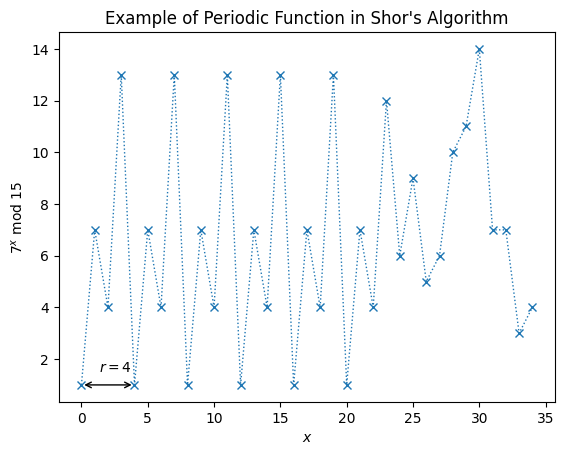

In [2]:
N = 15
a = 7

# Calculate the plotting data
xvals = np.arange(35)
yvals = [np.mod(a**x, N) for x in xvals]

# Use matplotlib to display it nicely
fig, ax = plt.subplots()
ax.plot(xvals, yvals, linewidth=1, linestyle='dotted', marker='x')
ax.set(xlabel='$x$', ylabel=f'${a}^x$ mod ${N}$',
       title="Example of Periodic Function in Shor's Algorithm")
try: # plot r on the graph
    r = yvals[1:].index(1) + 1
    plt.annotate('', xy=(0,1), xytext=(r,1),
                 arrowprops=dict(arrowstyle='<->'))
    plt.annotate(f'$r={r}$', xy=(r/3,1.5))
except ValueError:
    print('Could not find period, check a < N and have no common factors.')

#### Functions

In [3]:
# -------------------------
# Función para superíndices bonitos en Unicode
# -------------------------
def to_superscript(n):
    sup_map = str.maketrans("0123456789", "⁰¹²³⁴⁵⁶⁷⁸⁹")
    return str(n).translate(sup_map)


# -------------------------
# Construir matriz unitaria U_a mod N como permutación
# -------------------------
def z_star(N):
    return [x for x in range(1, N) if math.gcd(x, N) == 1]

def construct_unitary_gate_from_zstar(a, N, n_target):
    dim = 2**n_target
    U = np.eye(dim, dtype=complex)  # matriz compleja identidad por defecto

    zN_star = z_star(N)
    used = set()
    for x in zN_star:
        y = (a * x) % N
        if y not in zN_star:
            raise ValueError(f"Output y={y} not in Z*_N")
        if y in used:
            raise ValueError(f"Collision: a*x mod N is not a permutation over Z*_N (x={x}, y={y})")
        used.add(y)
        U[y][x] = 1.0
        U[x][x] = 0.0

    return UnitaryGate(U)


# -------------------------
# Construir circuito unitaria U mod N como permutación
# -------------------------
def controlled_U(qc, n_count, n_target, a, N):
  for k in tqdm(range(n_count), desc = f"Procesando Compuertas Controlled-U", bar_format='[{elapsed}<{remaining}] {n_fmt}/{total_fmt} | {l_bar}{bar} {rate_fmt}{postfix}', colour='red', leave=False):
    # U^{2^k}
    exp = 2**k
    U_power = U_gate.power(2**k)
    U_power.label = f"{a}{to_superscript(exp)} mod {N}"
    controlled_U = U_power.control()
    controlled_U.label = f"Control{to_superscript(exp)}"  # ← Opcional, para más claridad en el circuito
    qc.append(controlled_U, [k] + list(range(n_count, n_count + n_target)))

#### Building block of Shor's algorithm and results.

In [19]:
# Parámetros
N = 15
a = 7
n_count = 8
n_target = math.ceil(math.log2(N))

U_gate = construct_unitary_gate_from_zstar(a, N, n_target)

# -------------------------
# Circuito de QPE
# -------------------------
qc = QuantumCircuit(n_count + n_target, n_count)

# Paso 1: Hadamard
qc.h(range(n_count))

# Paso 2: Inicializar registro target en |1⟩
qc.x(n_count + n_target - 1)

# Paso 3: Controlled-U^{2^k}
controlled_U(qc, n_count, n_target, a, N)

# Paso 4: QFT⁻¹
qc.append(QFT(n_count, inverse=True, do_swaps=True), range(n_count))

# Paso 5: Medición
qc.measure(range(n_count), range(n_count))

print(qc.draw(fold=-1))



      ┌───┐   Control¹                                                                                                          ┌───────┐┌─┐                     
 q_0: ┤ H ├──────■──────────────────────────────────────────────────────────────────────────────────────────────────────────────┤0      ├┤M├─────────────────────
      ├───┤      │          Control²                                                                                            │       │└╥┘┌─┐                  
 q_1: ┤ H ├──────┼─────────────■────────────────────────────────────────────────────────────────────────────────────────────────┤1      ├─╫─┤M├──────────────────
      ├───┤      │             │          Control⁴                                                                              │       │ ║ └╥┘┌─┐               
 q_2: ┤ H ├──────┼─────────────┼─────────────■──────────────────────────────────────────────────────────────────────────────────┤2      ├─╫──╫─┤M├───────────────
      ├───┤      │          

#### Results.

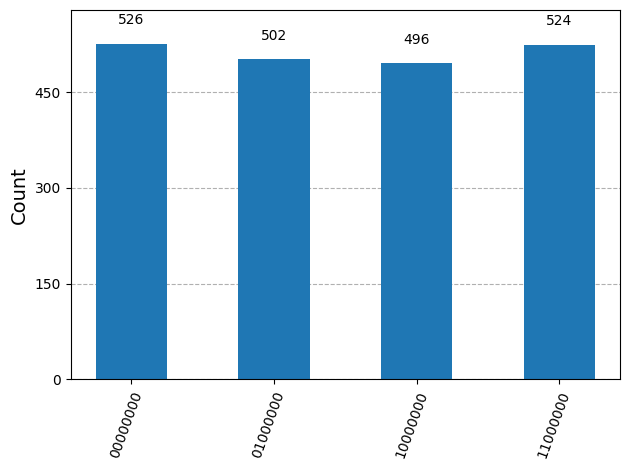

In [22]:

# -------------------------
# Simulación
# -------------------------
simulator = AerSimulator()
compiled = transpile(qc, simulator)
result = simulator.run(compiled, shots=2048).result()
counts = result.get_counts()
plot_histogram(counts)

In [5]:
rows, measured_phases = [], []
for output in counts:
    decimal = int(output, 2)  # Convert (base 2) string to decimal
    phase = decimal/(2**n_count)  # Find corresponding eigenvalue
    measured_phases.append(phase)
    # Add these values to the rows in our table:
    rows.append([f"{output}(bin) = {decimal:>3}(dec)",
                 f"{decimal}/{2**n_count} = {phase:.2f}"])
# Print the rows in a table
headers=["Register Output", "Phase"]
df = pd.DataFrame(rows, columns=headers)
print(df)

            Register Output           Phase
0  11000000(bin) = 192(dec)  192/256 = 0.75
1  10000000(bin) = 128(dec)  128/256 = 0.50
2  00000000(bin) =   0(dec)    0/256 = 0.00
3  01000000(bin) =  64(dec)   64/256 = 0.25


In [6]:
Fraction(0.666)

Fraction(5998794703657501, 9007199254740992)

In [7]:
# Get fraction that most closely resembles 0.666
# with denominator < 15
Fraction(0.666).limit_denominator(15)


Fraction(2, 3)

In [8]:
rows = []
for phase in measured_phases:
    frac = Fraction(phase).limit_denominator(15)
    rows.append([phase,
                 f"{frac.numerator}/{frac.denominator}",
                 frac.denominator])
# Print as a table
headers=["Phase", "Fraction", "Guess for r"]
df = pd.DataFrame(rows, columns=headers)
print(df)


   Phase Fraction  Guess for r
0   0.75      3/4            4
1   0.50      1/2            2
2   0.00      0/1            1
3   0.25      1/4            4


In [9]:
np.random.seed(1) # This is to make sure we get reproduceable results
a = randint(2, N)
print(a)

7


In [10]:
gcd(a, N)

1

#### Quantum Phase Estimation

In [12]:
def qpe_amod15(a, N):
  """Performs quantum phase estimation on the operation a*r mod 15.
  Args:
      a (int): This is 'a' in a*r mod 15
  Returns:
      float: Estimate of the phase
  """
  # Parámetros
  N = 15
  a = 7
  n_count = 8
  n_target = math.ceil(math.log2(N))

  U_gate = construct_unitary_gate_from_zstar(a, N, n_target)

  # -------------------------
  # Circuito de QPE
  # -------------------------
  qc = QuantumCircuit(n_count + n_target, n_count)

  # Paso 1: Hadamard
  qc.h(range(n_count))

  # Paso 2: Inicializar registro target en |1⟩
  qc.x(n_count + n_target - 1)

  # Paso 3: Controlled-U^{2^k}
  controlled_U(qc, n_count, n_target, a, N)

  # Paso 4: QFT⁻¹
  qc.append(QFT(n_count, inverse=True, do_swaps=True), range(n_count))

  # Paso 5: Medición
  qc.measure(range(n_count), range(n_count))

  # -------------------------
  # Simulación
  # -------------------------
  aer_sim = AerSimulator()

  #plot_histogram(counts)
  # `memory=True` tells the backend to save each measurement in a list
  job = aer_sim.run(transpile(qc, aer_sim), shots=2048, memory=True)
  readings = job.result().get_memory()
  print("Register Reading: " + readings[0])
  phase = int(readings[0],2)/(2**n_count)
  print(f"Corresponding Phase: {phase}")
  return phase

In [14]:
phase = qpe_amod15(a, N) # Phase = s/r
Fraction(phase).limit_denominator(15)

Register Reading: 11000000
Corresponding Phase: 0.75


Fraction(3, 4)

In [15]:
frac = Fraction(phase).limit_denominator(15)
s, r = frac.numerator, frac.denominator
print(s, r)

3 4


In [16]:
guesses = [gcd(a**(r//2)-1, N), gcd(a**(r//2)+1, N)]
print(guesses)


[3, 5]


#### Finding Factors of a = 7, N = 15.

In [17]:
N = 15
a = 7
FACTOR_FOUND = False
ATTEMPT = 0
print(f"Tryng a = {a} and N = {N}:")
while not FACTOR_FOUND:
    ATTEMPT += 1
    print(f"\nATTEMPT {ATTEMPT}:")
    phase = qpe_amod15(a, N) # Phase = s/r
    frac = Fraction(phase).limit_denominator(N)
    r = frac.denominator
    print(f"Result: r = {r}")
    if phase != 0:
        # Guesses for factors are gcd(x^{r/2} ±1 , 15)
        guesses = [gcd(a**(r//2)-1, N), gcd(a**(r//2)+1, N)]
        print(f"Guessed Factors: {guesses[0]} and {guesses[1]}")
        for guess in guesses:
            if guess not in [1,N] and (N % guess) == 0:
                # Guess is a factor!
                print(f"*** Non-trivial factor found: {guess} ***")
                FACTOR_FOUND = True

Tryng a = 7 and N = 15:

ATTEMPT 1:


Register Reading: 00000000
Corresponding Phase: 0.0
Result: r = 1

ATTEMPT 2:


Register Reading: 00000000
Corresponding Phase: 0.0
Result: r = 1

ATTEMPT 3:


Register Reading: 00000000
Corresponding Phase: 0.0
Result: r = 1

ATTEMPT 4:


Register Reading: 00000000
Corresponding Phase: 0.0
Result: r = 1

ATTEMPT 5:


Register Reading: 01000000
Corresponding Phase: 0.25
Result: r = 4
Guessed Factors: 3 and 5
*** Non-trivial factor found: 3 ***
*** Non-trivial factor found: 5 ***
